# CSC 4601 - Final Project 

## Apriori Algorithm - Market Basket Analysis 

**Description:** 

This jupyter notebook implements Apriori algorithm for market basker analysis.

For our implementation of the Apriori algorithm, we followed geeksforgeeks article titled "Implementing Apriori algorithm in Python" and used the corresponding dataset. 

We used the Apriori algorithm to find frequent itemsets (combinations of items that often occur together). For this, we needed to use a minimum support of 0.01 to get common combinations of items. We generated association rules based on the frequent itemsets and through the metrics support, confidence, and lift. Lastly, we used a bar plot to visualize the most purchased items. 


Kelsey Collins and Lauren Dwelley

In [2]:
#!pip install mlxtend

In [17]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [18]:
#loading dataset into a dataframe 
market_pd = pd.read_csv('Groceries_dataset.csv')
market_data = pd.DataFrame(market_pd)
market_data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [19]:
#groupd items by transaction
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
basket = market_data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
#print(transactions)

In [20]:
#convert to one-hot format 
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [21]:
#run apriori algorithm to find frequent itemsets with items commonly bought together 
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])


Total Frequent Itemsets: 69


In [22]:
#generate association rules 
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

Association Rules: 4


,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


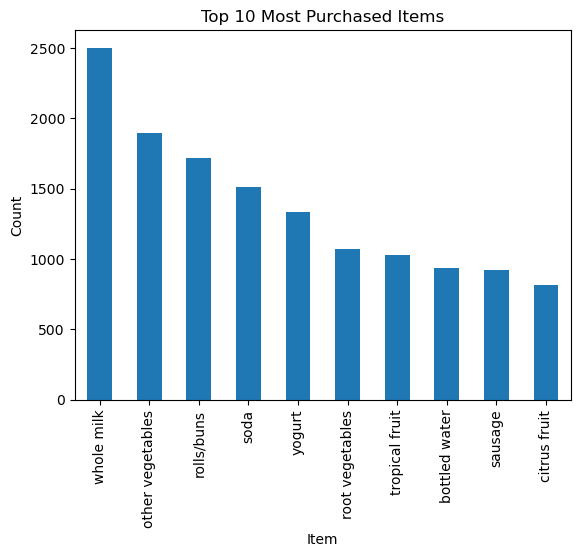

In [23]:
#visualize the most popular items 
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
top_items = market_data['itemDescription'].value_counts().head(10)
top_items.plot(kind='bar', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()